<a href="https://colab.research.google.com/github/seanzhu815/business-forecasting/blob/main/405_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import LabelBinarizer
import warnings
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import pacf


warnings.filterwarnings("ignore")
plt.rc("figure", figsize=(15,9))


In [4]:
pip install fredapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from fredapi import Fred
fred = Fred(api_key='bf17fe12d011c8601d2db6269323cfd6')

In [ ]:
fred.search('house price', filter=('frequency', 'Monthly')).T

In [6]:
caur = pd.DataFrame(fred.get_series_latest_release('CAUR'))
caur.reset_index(inplace=True)
caur.columns=['DATE', 'CAUR']
df = caur

In [7]:
for i in ['CORESTICKM159SFRBATL','MCOILBRENTEU', 'CPIUFDSL','MEDCPIM158SFRBCLE','PCE', 'T5YIEM','T10YIEM','USALORSGPNOSTSAM', 'CIVPART','RETAILIRSA', 'BUSLOANS', 'TOTALSL','FEDFUNDS','T1YFFM','T5YFFM','T10YFFM','AAA','BAA','CSUSHPISA']:
    df_temp = pd.DataFrame(fred.get_series_latest_release(i))
    df_temp.reset_index(inplace=True)
    df_temp.columns=['DATE',i]
    df = pd.merge(df, df_temp, on='DATE', how='left')

In [8]:
df.set_index('DATE', inplace=True)

In [ ]:
df

In [9]:
df.columns

Index(['CAUR', 'CORESTICKM159SFRBATL', 'MCOILBRENTEU', 'CPIUFDSL',
       'MEDCPIM158SFRBCLE', 'PCE', 'T5YIEM', 'T10YIEM', 'USALORSGPNOSTSAM',
       'CIVPART', 'RETAILIRSA', 'BUSLOANS', 'TOTALSL', 'FEDFUNDS', 'T1YFFM',
       'T5YFFM', 'T10YFFM', 'AAA', 'BAA', 'CSUSHPISA'],
      dtype='object')

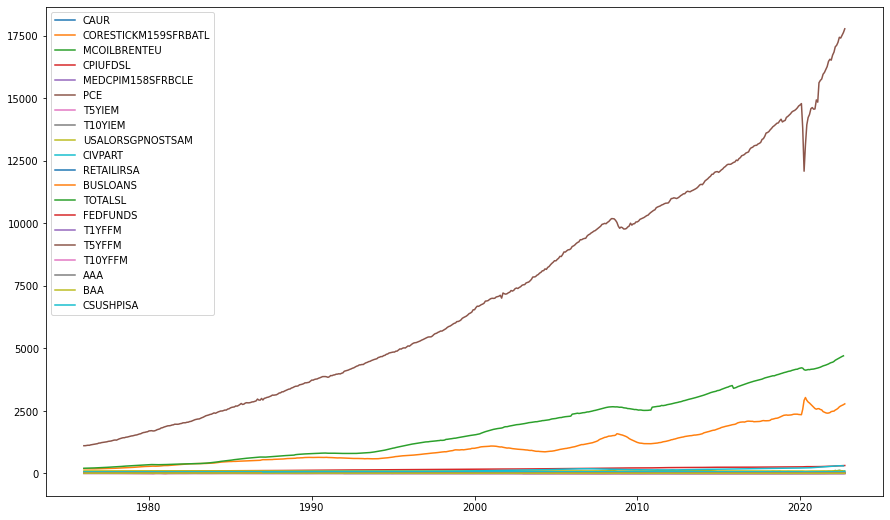

In [9]:
for i in df.columns:
    plt.plot(df[i], label=i)
    plt.legend()

In [10]:
for i in df.columns:
    print(i, ' mean:',df[i].mean(), ' std:', df[i].std(), ' 1st acf:', sm.tsa.acf(df[i].dropna())[1])

CAUR  mean: 7.249288256227759  std: 2.1931446892510715  1st acf: 0.9730755026117816
CORESTICKM159SFRBATL  mean: 4.010384573295373  std: 2.648033435529739  1st acf: 0.9933039481084095
MCOILBRENTEU  mean: 48.41612676056338  std: 32.905408098657404  1st acf: 0.9851363801721938
CPIUFDSL  mean: 169.24767081850533  std: 62.96617685919954  1st acf: 0.9925707222992902
MEDCPIM158SFRBCLE  mean: 3.00846883374793  std: 1.2690939828157077  1st acf: 0.708183311336392
PCE  mean: 7080.1128113879  std: 4419.1316008033555  1st acf: 0.9927965700612114
T5YIEM  mean: 1.8946638655462182  std: 0.5846175969282477  1st acf: 0.9262271062451235
T10YIEM  mean: 2.0710084033613443  std: 0.4112026099466975  1st acf: 0.9387581535559261
USALORSGPNOSTSAM  mean: 99.99048878959809  std: 1.2312753926373914  1st acf: 0.9680982868105062
CIVPART  mean: 64.82313167259787  std: 1.737024361733395  1st acf: 0.9887092384188074
RETAILIRSA  mean: 1.5041463414634146  std: 0.1363514889026919  1st acf: 0.9703246033037846
BUSLOANS  mea

In [11]:
for i in df.columns:
    print(i, sm.tsa.stattools.adfuller(df[i].dropna()))

CAUR (-2.8786691097310197, 0.047885312964737, 4, 557, {'1%': -3.4421447800270673, '5%': -2.8667429272780858, '10%': -2.5695409929766093}, 728.648736457037)
CORESTICKM159SFRBATL (-2.53536103372299, 0.1071059098090722, 18, 543, {'1%': -3.442450336733213, '5%': -2.8668774460774498, '10%': -2.5696126760816553}, -298.13840025959973)
MCOILBRENTEU (-2.109807686303645, 0.24058921360041785, 1, 424, {'1%': -3.445867291195605, '5%': -2.868380822100627, '10%': -2.5704139268867925}, 2440.5288640970875)
CPIUFDSL (1.6558214268994687, 0.9980157466362776, 5, 556, {'1%': -3.4421660928041633, '5%': -2.8667523104859627, '10%': -2.56954599309042}, 602.5278277831023)
MEDCPIM158SFRBCLE (-2.6679539916770425, 0.07974967322008625, 13, 464, {'1%': -3.4445220811896657, '5%': -2.8677891615873192, '10%': -2.5700985643950656}, 1062.4545225296683)
PCE (3.1780042130320916, 1.0, 12, 549, {'1%': -3.4423174665535385, '5%': -2.866818952732754, '10%': -2.569581505602171}, 6603.928444821296)
T5YIEM (-4.008913880746518, 0.00

In [12]:
df['CPIUFDSL']=df['CPIUFDSL'].diff(1)
df['CIVPART']=df['CIVPART'].diff(1)
df['RETAILIRSA']=df['RETAILIRSA'].diff(1)
df['BUSLOANS']=df['BUSLOANS'].diff(1)
df['AAA']=df['AAA'].diff(1)
df['BAA']=df['BAA'].diff(1)
df['CSUSHPISA']=df['CSUSHPISA'].diff(1)


In [15]:
df['PCE']=df['PCE'].diff(1)

In [20]:
df['TOTALSL']=df['TOTALSL'].diff(1)

In [22]:
for i in df.columns:
    print(i, sm.tsa.stattools.adfuller(df[i].dropna()))

CAUR (-2.8786691097310197, 0.047885312964737, 4, 557, {'1%': -3.4421447800270673, '5%': -2.8667429272780858, '10%': -2.5695409929766093}, 728.648736457037)
CORESTICKM159SFRBATL (-2.53536103372299, 0.1071059098090722, 18, 543, {'1%': -3.442450336733213, '5%': -2.8668774460774498, '10%': -2.5696126760816553}, -298.13840025959973)
MCOILBRENTEU (-9.568862170180111, 2.317225962317313e-16, 5, 419, {'1%': -3.4460536145702383, '5%': -2.868462751982839, '10%': -2.570457599182051}, 2436.218806007703)
CPIUFDSL (-4.146276291830194, 0.0008113152661036559, 4, 556, {'1%': -3.4421660928041633, '5%': -2.8667523104859627, '10%': -2.56954599309042}, 603.2065590494112)
MEDCPIM158SFRBCLE (-2.6679539916770425, 0.07974967322008625, 13, 464, {'1%': -3.4445220811896657, '5%': -2.8677891615873192, '10%': -2.5700985643950656}, 1062.4545225296683)
PCE (-5.316527549033973, 5.060117399114677e-06, 11, 549, {'1%': -3.4423174665535385, '5%': -2.866818952732754, '10%': -2.569581505602171}, 6600.712778440037)
T5YIEM (-4

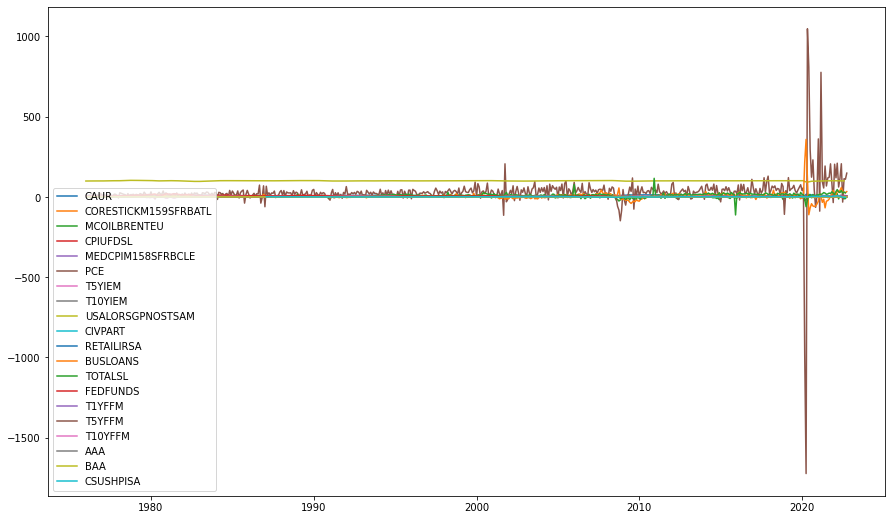

In [21]:
for i in df.columns:
    plt.plot(df[i], label=i)
    plt.legend()

In [ ]:
df

In [ ]:
df.isna().sum()

In [ ]:
sm.tsa.stattools.arma_order_select_ic(df['CAUR'],max_ar=12, max_ma=12, ic='aic')

In [23]:
#Define the Models with appropriate Lag structure
mod_bench=ARIMA(df['CAUR'],order=(2,0,6),enforce_stationarity=True,enforce_invertibility=True)
res_bench=mod_bench.fit()
res_bench.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   CAUR   No. Observations:                  562
Model:                 ARIMA(2, 0, 6)   Log Likelihood                -359.498
Date:                Sun, 04 Dec 2022   AIC                            738.996
Time:                        06:19:35   BIC                            782.311
Sample:                    01-01-1976   HQIC                           755.907
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2206      0.745      9.693      0.000       5.760       8.681
ar.L1          1.9664      0.039     50.052      0.000       1.889       2.043
ar.L2         -0.9675      0.038    -25.483      0.000      -1.042      -0.893
ma.L1         -0.7255      0.033    -21.916      0.000      -0.790      -0.661
ma.L2         -0.3219      0.033     -9.712      0.000      -0.387      -0.257
ma.L3          0.0858      0.033      2.626      0.009       0.022       0.150
ma.L4         -0.0614      0.035     -1.762      0.078      -0.130       0.007
ma.L5         -0.0438      0.038     -1.154      0.248      -0.118       0.031
ma.L6          0.0761      0.033      2.303      0.021       0.011       0.141
sigma2         0.2089      0.004     48.550      0.000       0.200       0.217
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           3723228.58
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              43.36   Skew:                            18.13
Prob(H) (two-sided):                  0.00   Kurtosis:                       400.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

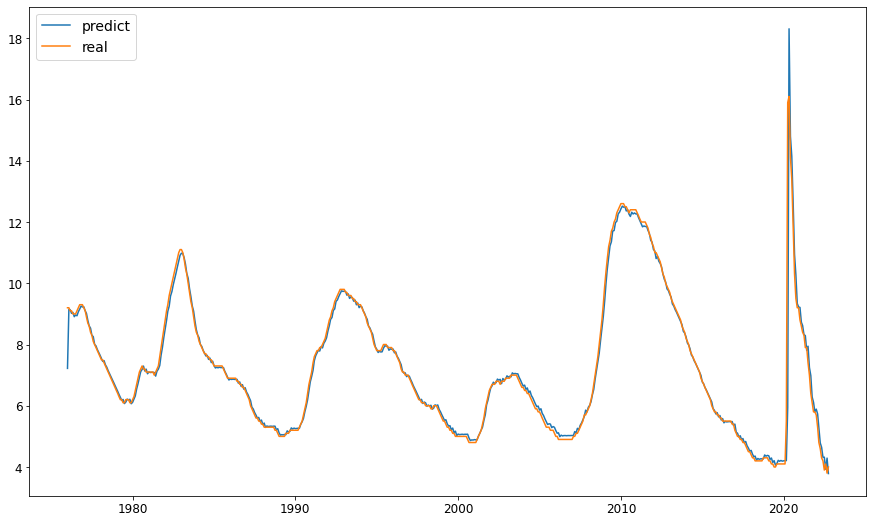

In [ ]:
plt.plot(res_bench.predict(), label='predict')
plt.plot(df.CAUR,label='real')
plt.legend()

In [ ]:
sm.stats.acorr_ljungbox(df['CAUR'], lags=[i for i in range(13)], return_df=True,boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
0,4336.120067,NaN,4277.854483,NaN
1,534.989966,2.319339e-118,532.144275,9.648326e-118
2,1029.256720,3.160407e-224,1022.905591,7.566120e-223
3,1487.093306,0.000000e+00,1476.683341,0.000000e+00
4,1909.052885,0.000000e+00,1894.153989,0.000000e+00
5,2299.409016,0.000000e+00,2279.665274,0.000000e+00
6,2663.205194,0.000000e+00,2638.301223,0.000000e+00
7,3002.784924,0.000000e+00,2972.462128,0.000000e+00
8,3318.130035,0.000000e+00,3282.216013,0.000000e+00
9,3608.419248,0.000000e+00,3566.843557,0.000000e+00


In [ ]:
df

In [ ]:
df['CAUR'].iloc[394:]

DATE
2008-11-01     8.8
2008-12-01     9.3
2009-01-01     9.9
2009-02-01    10.4
2009-03-01    10.8
              ... 
2022-06-01     4.2
2022-07-01     3.9
2022-08-01     4.1
2022-09-01     3.8
2022-10-01     4.0
Name: CAUR, Length: 168, dtype: float64

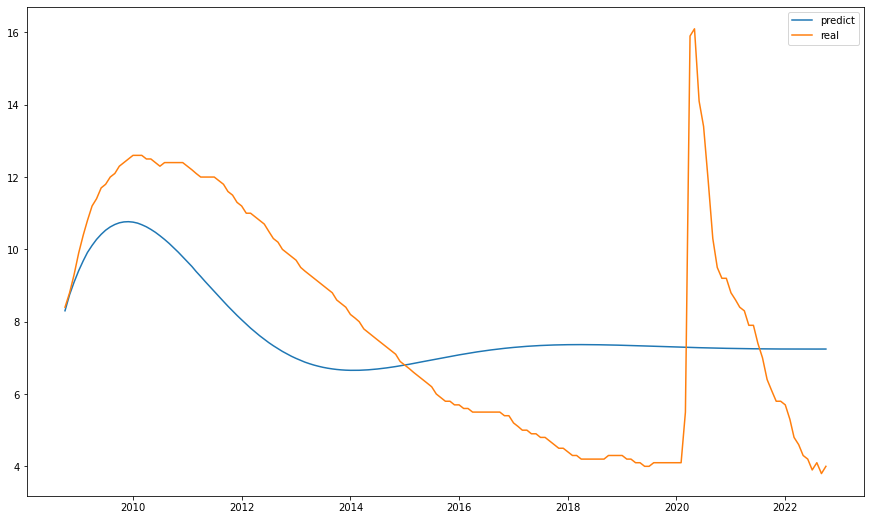

In [39]:
mod_bench_oos=ARIMA(df['CAUR'].iloc[:394],order=(2,0,6),enforce_stationarity=True,enforce_invertibility=True)
res_bench_oos=mod_bench_oos.fit()
plt.plot(res_bench_oos.predict(start='2008-10-01', end='2022-10-01'), label='predict')
plt.plot(df.CAUR.iloc[393:],label='real')
plt.legend()

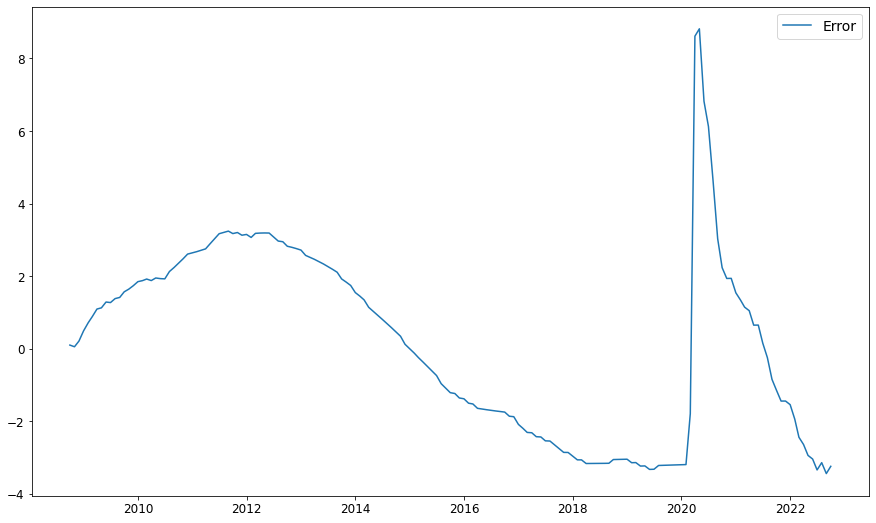

In [ ]:
error_arima=np.array(df.CAUR.iloc[393:])-res_bench_oos.predict(start='2008-10-01', end='2022-10-01')
plt.plot(error_arima,label='Error')
plt.legend()

In [40]:
from scipy.stats import shapiro
print(shapiro(res_bench.resid))

ShapiroResult(statistic=0.2215314507484436, pvalue=4.484155085839415e-43)


In [ ]:
print(shapiro(res_bench_oos.resid))

ShapiroResult(statistic=0.4314868450164795, pvalue=2.178827635733066e-33)


In [41]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(df['CAUR'], res_bench.predict()))

0.21572034256181727


In [42]:
print(mean_squared_error(df['CAUR'].iloc[393:], res_bench_oos.predict(start='2008-10-01', end='2022-10-01')))

6.611493652141854


In [43]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [26]:
df1=df
for i in range(1, 13):
    df1["lag_{}".format(i)] = df['CAUR'].shift(i)

In [ ]:
df1

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [27]:
y = df1.dropna().CAUR
X = df1.dropna().drop(['CAUR'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled=scaler.transform(X)

In [30]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

In [80]:
from xgboost import XGBRegressor 

xgb = XGBRegressor()
xgbmodel_is = xgb.fit(X_scaled, y)

[07:45:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
plt.plot(xgbmodel_is.predict(X_test_scaled), label='predict')
plt.plot(np.array(y_test), label='real', alpha=0.5)
plt.title('in sample')
plt.legend()
print(mean_squared_error(xgbmodel_is.predict(X_test_scaled), y_test))

In [82]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=tscv)
lasso.fit(X_scaled, y)


LassoCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None))

In [ ]:
plt.plot(lasso.predict(X_test_scaled), label='predict')
plt.plot(np.array(y_test), label='real', alpha=0.5)
plt.title('in sample')
plt.legend()
print(mean_squared_error(lasso.predict(X_test_scaled), y_test))

In [84]:
RF = RandomForestRegressor(n_estimators=500, random_state=1)
RF_model=RF.fit(X_scaled, y)

In [ ]:
plt.plot(RF_model.predict(X_test_scaled), label='predict')
plt.plot(np.array(y_test), label='real', alpha=0.5)
plt.title('in sample')
plt.legend()
print(mean_squared_error(RF_model.predict(X_test_scaled), y_test))

In [105]:
xgb_i=0.004517890649068488
lasso_i=0.170615373241522
rf_i=0.26014128225352534

In [107]:
w1=xgb_i**(-2)/(xgb_i**(-2)+lasso_i**(-2)+rf_i**(-2))
w1

0.9989982006259913

In [88]:
w2=lasso_i**(-2)/(xgb_i**(-2)+lasso_i**(-2)+rf_i**(-2))

In [89]:
w3=rf_i**(-2)/(xgb_i**(-2)+lasso_i**(-2)+rf_i**(-2))

In [90]:
f_fore=w1*xgbmodel_is.predict(X_test_scaled)+w3*RF_model.predict(X_test_scaled)+w2*lasso.predict(X_test_scaled)

0.004527307280362165


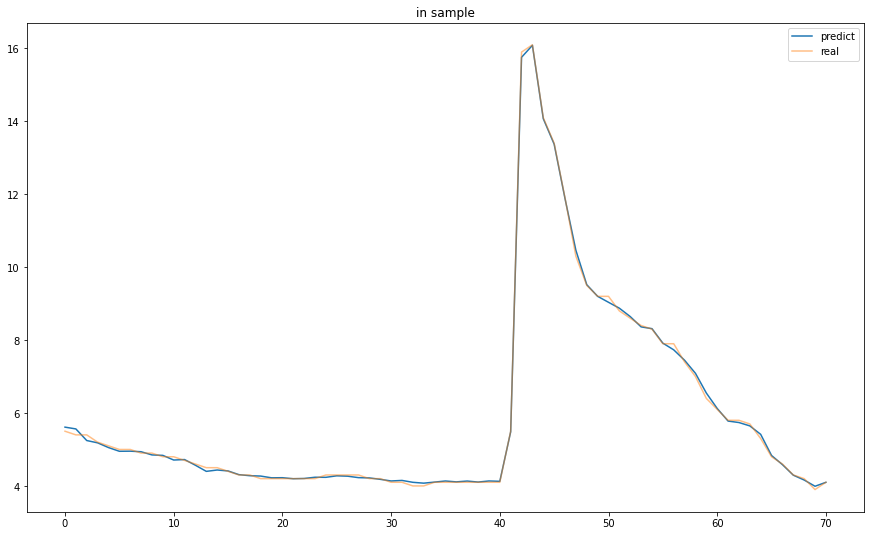

In [92]:
plt.plot(f_fore, label='predict')
plt.plot(np.array(y_test), label='real', alpha=0.5)
plt.title('in sample')
plt.legend()
print(mean_squared_error(f_fore, y_test))

## oos

In [93]:
xgbmodel_oos = xgb.fit(X_train_scaled, y_train)

[07:50:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


2.193752653331945


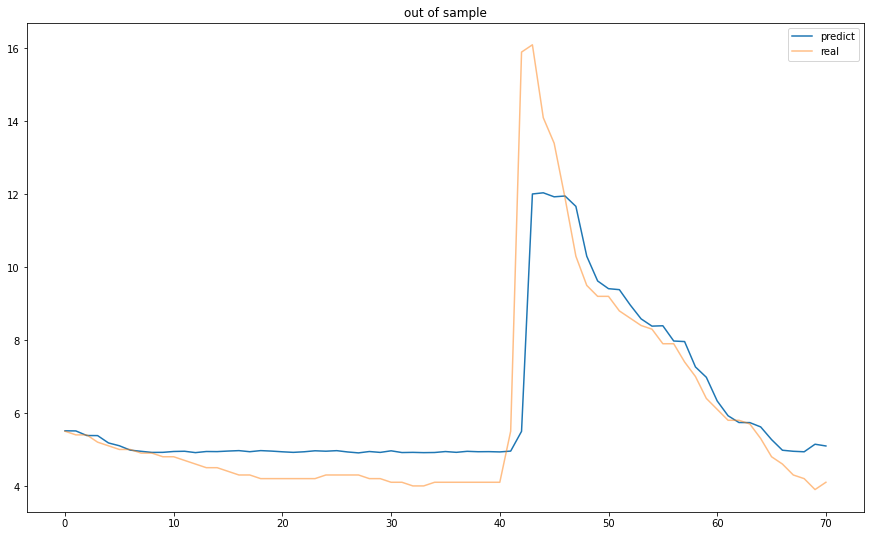

In [108]:
plt.plot(xgbmodel_oos.predict(X_test_scaled), label='predict')
plt.plot(np.array(y_test), label='real', alpha=0.5)
plt.title('out of sample')
plt.legend()
print(mean_squared_error(xgbmodel_oos.predict(X_test_scaled), y_test))

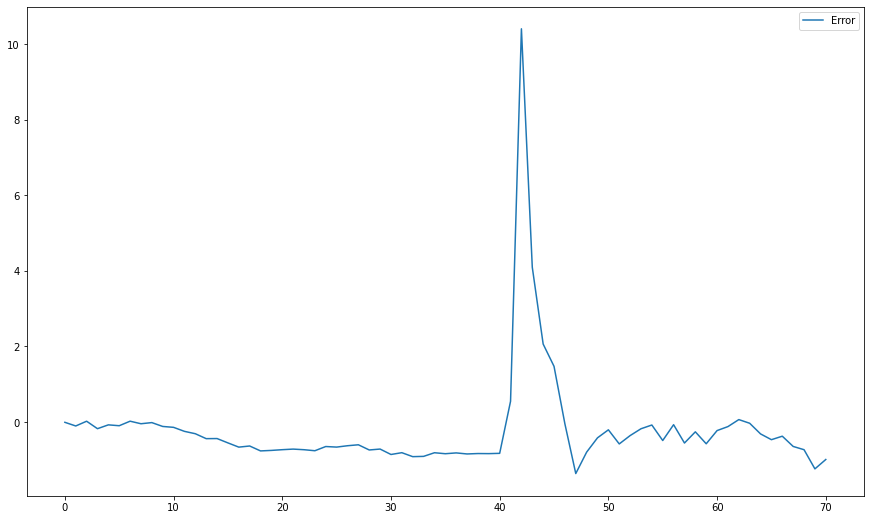

In [135]:
error_xgb=np.array(y_test)-xgbmodel_oos.predict(X_test_scaled)
plt.plot(error_xgb,label='Error')
plt.legend()

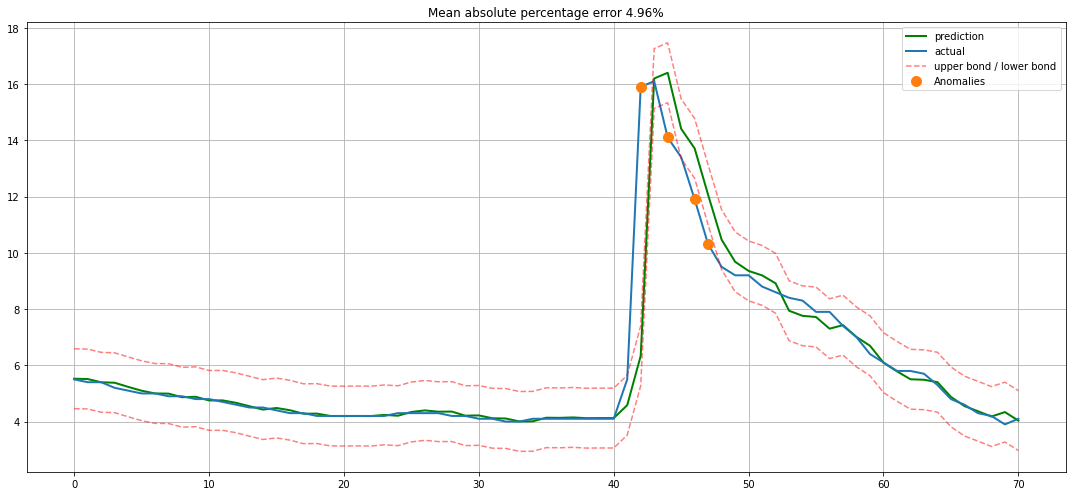

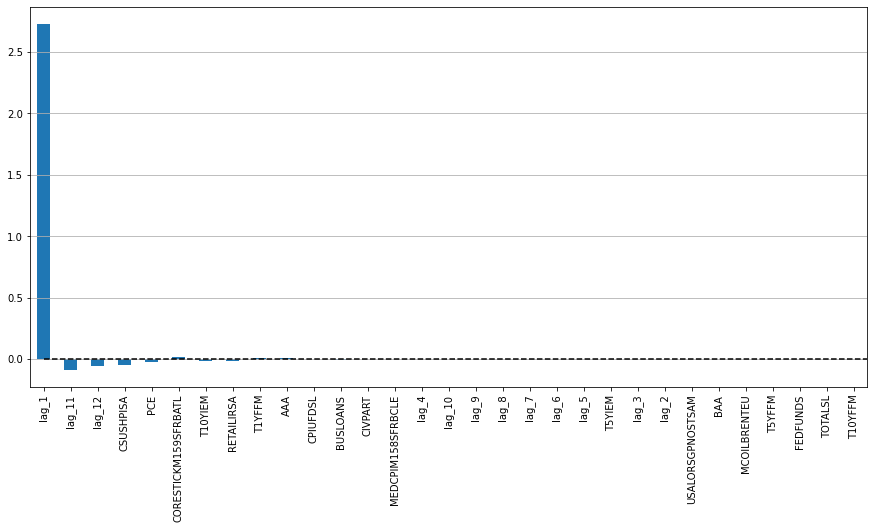

In [121]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)

plotModelResults(lasso, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)

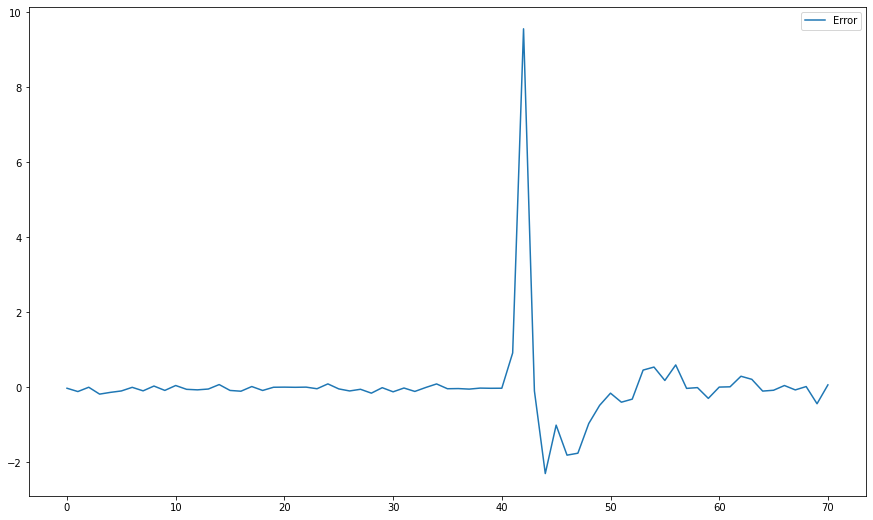

In [122]:
error_lasso=np.array(y_test)-lasso.predict(X_test_scaled)
plt.plot(error_lasso,label='Error')
plt.legend()

In [126]:
import numpy as np
from statsmodels.stats.stattools import durbin_watson
c=durbin_watson(error_lasso)
c

1.6638516361886113

In [136]:
a=durbin_watson(error_xgb)
a

0.9623211425829609

0.8820754235978587

In [97]:
mean_squared_error(lasso.predict(X_test_scaled), y_test)

1.5212199010651193

In [118]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=500, random_state=1)
RF_model=RF.fit(X_train_scaled, y_train)

2.3026362557746674


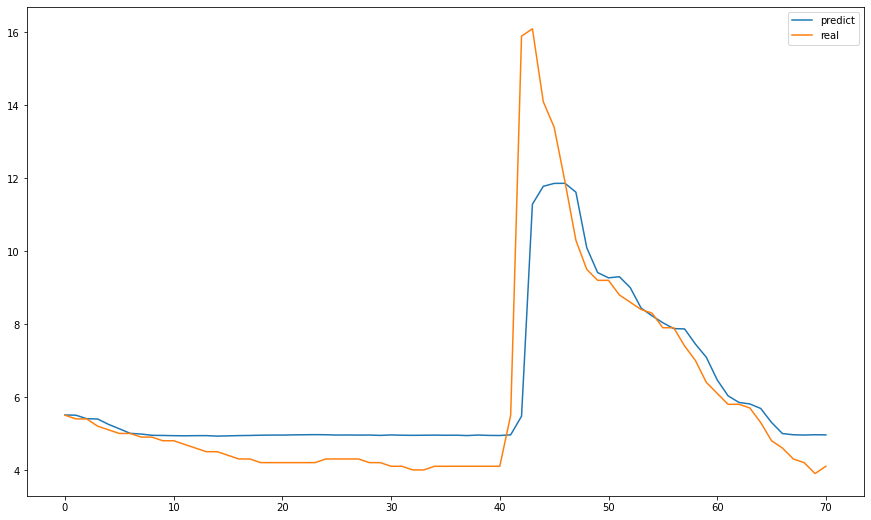

In [119]:
plt.plot(RF_model.predict(X_test_scaled), label='predict')
plt.plot(np.array(y_test),label='real')
plt.legend()
print(mean_squared_error(RF_model.predict(X_test_scaled), y_test))

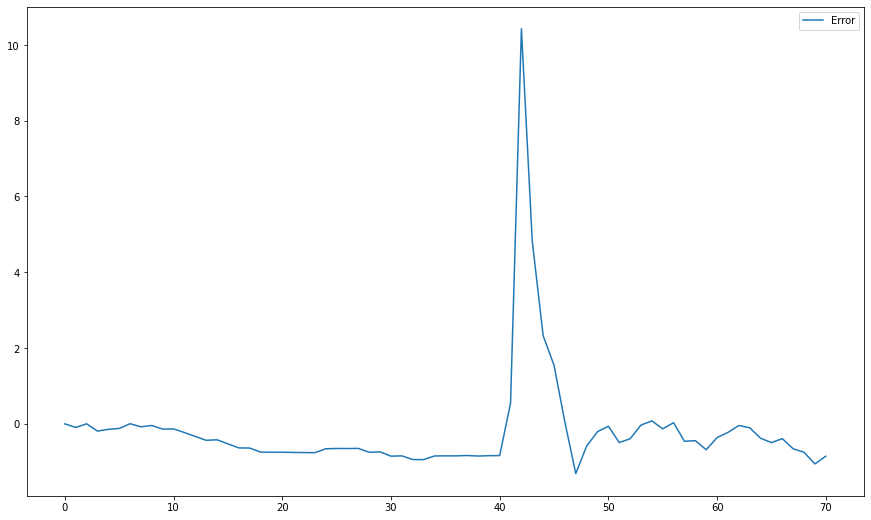

In [133]:
error_rf=np.array(y_test)-RF_model.predict(X_test_scaled)
plt.plot(error_rf,label='Error')
plt.legend()

In [134]:
b=durbin_watson(error_rf)
b

0.8820754235978587

In [99]:
xgb_MSE=2.193752653331945
lasso_MSE=1.5212199010651193
rf_MSE=2.3026362557746674

In [100]:
w1=xgb_MSE**(-2)/(xgb_MSE**(-2)+lasso_MSE**(-2)+rf_MSE**(-2))

In [101]:
w2=lasso_MSE**(-2)/(xgb_MSE**(-2)+lasso_MSE**(-2)+rf_MSE**(-2))

In [102]:
w3=rf_MSE**(-2)/(xgb_MSE**(-2)+lasso_MSE**(-2)+rf_MSE**(-2))
w3

0.2276374708920888

In [103]:
f_fore=w1*xgbmodel_oos.predict(X_test_scaled)+w3*RF_model.predict(X_test_scaled)+w2*lasso.predict(X_test_scaled)

1.6162914063184535


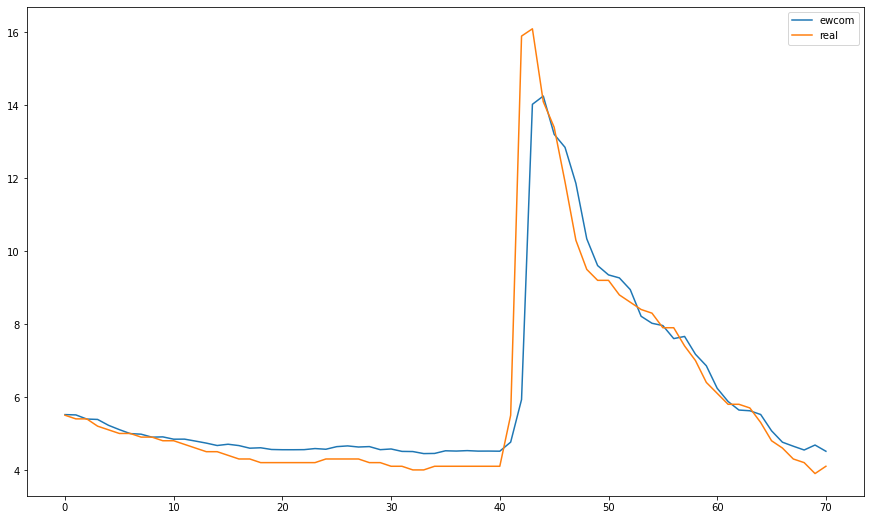

In [104]:
plt.plot(f_fore,label='ewcom')
plt.plot(np.array(y_test),label='real')
plt.legend()
print(mean_squared_error(f_fore, y_test))

MZ test

In [137]:
dfpredict = pd.DataFrame(columns=['xgb','rf','lasso','ewcom'])
dfpredict['xgb']=xgbmodel_oos.predict(X_test_scaled)
dfpredict['rf']= RF_model.predict(X_test_scaled)
dfpredict['lasso']=lasso.predict(X_test_scaled)
dfpredict['ewcom']=ewcom

In [138]:
dfpredict['arima']=np.array(res_bench_oos.predict(start='2016-10-01', end='2022-08-01'))

In [139]:
dfpredict['y']=np.array(y_test)

In [ ]:
dfpredict

,xgb,rf,lasso,ewcom,y,arima
0,5.453116,5.4830,5.455196,5.463771,5.5,7.248925
1,5.432528,5.4844,5.450378,5.455769,5.4,7.262967
2,5.163743,5.3068,5.356033,5.275525,5.4,7.276048
3,5.173954,5.2978,5.343728,5.271827,5.2,7.288167
4,5.150933,5.0864,5.145391,5.127575,5.1,7.299328
...,...,...,...,...,...,...
66,4.890023,5.0164,4.731364,4.879262,4.6,7.243014
67,5.042551,4.9962,4.600965,4.879905,4.3,7.242896
68,5.045103,4.9950,4.331007,4.790370,4.2,7.242876
69,5.042118,4.9934,4.247240,4.760919,3.9,7.242949


In [ ]:
mz_xgb = sm.OLS(dfpredict['y'], sm.add_constant(dfpredict['xgb'])).fit()
hypotheses = '(const = 0), (xgb = 1)'
mz_xgb.f_test(hypotheses)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=2.6512118155149396, p=0.07774828537110873, df_denom=69, df_num=2>

In [ ]:
mz_rf = sm.OLS(dfpredict['y'], sm.add_constant(dfpredict['rf'])).fit()
hypotheses = '(const = 0), (rf = 1)'
mz_rf.f_test(hypotheses)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=4.080645284632831, p=0.021135448660163002, df_denom=69, df_num=2>

In [ ]:
mz_lasso = sm.OLS(dfpredict['y'], sm.add_constant(dfpredict['lasso'])).fit()
hypotheses = '(const = 0), (lasso = 1)'
mz_lasso.f_test(hypotheses)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=2.2803290837201016, p=0.10990569878280933, df_denom=69, df_num=2>

DM test

In [141]:
# Author   : John Tsang
# Date     : December 7th, 2017
# Purpose  : Implement the Diebold-Mariano Test (DM test) to compare 
#            forecast accuracy
# Input    : 1) actual_lst: the list of actual values
#            2) pred1_lst : the first list of predicted values
#            3) pred2_lst : the second list of predicted values
#            4) h         : the number of stpes ahead
#            5) crit      : a string specifying the criterion 
#                             i)  MSE : the mean squared error
#                            ii)  MAD : the mean absolute deviation
#                           iii) MAPE : the mean absolute percentage error
#                            iv) poly : use power function to weigh the errors
#            6) poly      : the power for crit power 
#                           (it is only meaningful when crit is "poly")
# Condition: 1) length of actual_lst, pred1_lst and pred2_lst is equal
#            2) h must be an integer and it must be greater than 0 and less than 
#               the length of actual_lst.
#            3) crit must take the 4 values specified in Input
#            4) Each value of actual_lst, pred1_lst and pred2_lst must
#               be numerical values. Missing values will not be accepted.
#            5) power must be a numerical value.
# Return   : a named-tuple of 2 elements
#            1) p_value : the p-value of the DM test
#            2) DM      : the test statistics of the DM test
##########################################################
# References:
#
# Harvey, D., Leybourne, S., & Newbold, P. (1997). Testing the equality of 
#   prediction mean squared errors. International Journal of forecasting, 
#   13(2), 281-291.
#
# Diebold, F. X. and Mariano, R. S. (1995), Comparing predictive accuracy, 
#   Journal of business & economic statistics 13(3), 253-264.
#
##########################################################
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)   
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = isinstance(actual, float)
            is_pred1_ok = isinstance(pred1, float)
            is_pred2_ok = isinstance(pred2, float)
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    rt = dm_return(DM = round(DM_stat,4), p_value = round(p_value,4))
    
    return rt

In [143]:
dm_test(dfpredict['y'],dfpredict['lasso'],dfpredict['arima'])

dm_return(DM=-6.375, p_value=0.0)